<a href="https://colab.research.google.com/github/dsjes/titanic-analysis/blob/main/%E5%B0%88%E6%A1%88%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#專案實作#01:鐵達尼號存活預測

#環境準備

In [1]:
#匯入所需要的套件
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#匯入資料
url = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv"
df_train = pd.read_csv(url)
print(df_train.shape)
print(type(df_train))
#可知此df_train是由891行12列組成的dataframe

(891, 12)
<class 'pandas.core.frame.DataFrame'>


In [3]:
#先觀察前五筆資料
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#列印出資料中所有欄位
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

definition of each column:

1.Survived: 1 means survived; 0 means not survived

2.Pclass: ticket class。
1 means upper class; 2 means middle class; 3 means lower class

3.Name: passenger's name

4.Sex: passenger's sex

5.Age: passenger's age

6.Parch: of parents / children aboard the Titanic

7.Sibsp: of siblings / spouses aboard the Titanic

8.Fare: passenger fare

9.Cabin: cabin number

10.Embarked: port of embarkation。
C means Cherbourg; Q means Queenstown; S means Southampton

11.Ticket: ticket number

In [5]:
#新增死亡欄位方便繪圖
df_train["Died"] = 1 - df_train["Survived"]

#製作圖表觀察變數間的關係

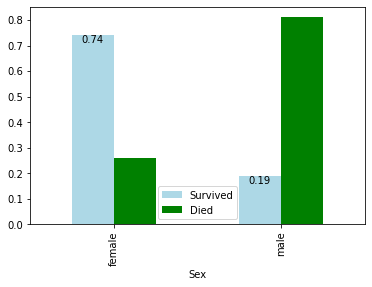

In [6]:
#觀察性別與存活與否的關係，可以得知女性生存比例較高，推測可能是當時的社會風氣造成大部分男性禮讓女性搭救生艇
age_sur = df_train.groupby("Sex")[["Survived","Died"]].mean()
df_train.groupby("Sex")[["Survived","Died"]].mean().plot(kind = "bar",color = ["lightblue","green"])
for i in range(len(age_sur["Survived"])):
  plt.text(i - 0.13,age_sur["Survived"][i],"%.2f" % age_sur["Survived"][i],ha = "center",va = "top")


        Survived      Died
Pclass                    
1       0.629630  0.370370
2       0.472826  0.527174
3       0.242363  0.757637


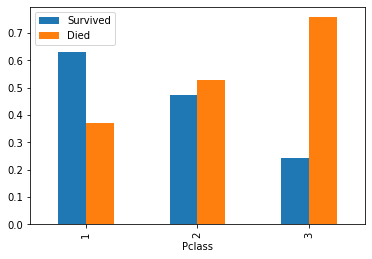

In [7]:
#Pclass 為船艙的等級，分別為 Pclass1、Pclass2、Pclass3，其中生存率高到低也是Pclass1、Pclass2、Pclass3
#推測 Pclass1 應該為最高等級的船艙
pcla_sur = df_train.groupby("Pclass")[["Survived","Died"]].mean()
print(pcla_sur)
df_train.groupby("Pclass")[["Survived","Died"]].mean().plot(kind = "bar")

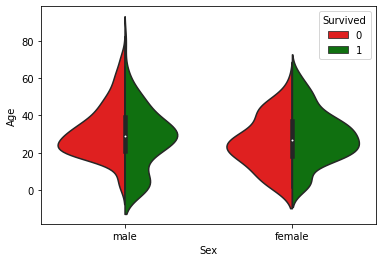

In [8]:
#同時觀察年齡與性別對是否存活的影響，可看出兩種性別的年齡介於20-40之間時有最大的存活率

sns.violinplot(x = "Sex",y = "Age",data = df_train,split = "True",palette = ["r","g"],hue = "Survived")

<Figure size 1800x1800 with 0 Axes>

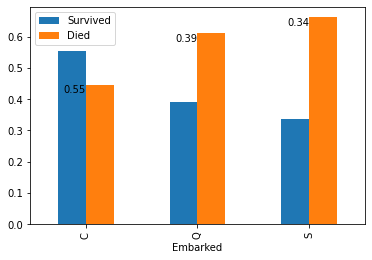

<Figure size 1800x1800 with 0 Axes>

In [9]:
#觀察登船地點對存活率的影響，可知從 C 地登船的生存率最高
emb_sur = df_train.groupby("Embarked")[["Survived","Died"]].mean()

df_train.groupby("Embarked")[["Survived","Died"]].mean().plot(kind = "bar")
pclass = list(emb_sur.index)
for i in range(len(emb_sur["Survived"])):
  plt.text(i-0.1, emb_sur["Died"][i], "%.2f" % emb_sur["Survived"][i], ha = "center", va = "top")

plt.figure(figsize = (25,25))


In [10]:
#印出df_train的資訊，可以知道各欄位的屬性與是否有遺失值
print(df_train.info())
print(df_train.isnull().any())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Died         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB
None
PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare    

In [11]:
#發現Cabin內的遺失值太多，因此直接刪掉
df_train = df_train.drop(["Cabin"],axis = 1)

由info可知Age、Cabin、Embarked有遺失值，其中為object的欄位有Name、Sex、Ticket、Cabin、Embarked

In [12]:
#觀察df_train中是object的資料分別有什麼數據，其中Sex、Embarked的分類較少
for i in df_train.select_dtypes("object"):
  print(df_train[i].value_counts())
  print("------------")

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
------------
male      577
female    314
Name: Sex, dtype: int64
------------
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64
------------
S    644
C    168
Q     77
Name: Embarked, dtype: int64
------------


#特徵工程

Name、Ticket可以透過拆解來產生新變數

In [13]:
url2 = "https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv"
df_test = pd.read_csv(url2)
df = df_train.drop("Died",axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


從Name欄位中可以發現，名字前有頭銜，頭銜可能代表社會地位，因此或許與生存率相關，可以提出分析，找出是否有關鍵因素

In [14]:
title = pd.DataFrame()
#將title中的頭銜拆解出來
title["Title"] = df["Name"].map(lambda name: name.split(",")[1].split(".")[0].strip())
#頭銜前面會多一個空格，因此需要用strip()
title                                      

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [15]:
print(title["Title"].unique())
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Johnheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr": "Mr",
    "Mrs": "Mrs",
    "Miss": "Miss",
    "Master": "Master",
    "Lady": "Royalty"
    }
title["Title"] = title["Title"].map(Title_Dictionary)
title = pd.get_dummies(title["Title"])
title.head()

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


接下來處理Ticket欄位，發現Ticket中有些有英文，有些只有數字，因此先清除"."、"/"，並改成" "，寫一個function清理Ticket欄位

In [16]:
ticket = df["Ticket"]
ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

(法一:較早期的做法)

In [17]:
def cleanticket(ticket):
  ticket = ticket.replace(".","")
  ticket = ticket.replace("/","")
  #split()預設是用空白來切分，例如將PC 17599切分成PC 17599
  ticket = ticket.split()
  #strip()將空白移除，例如將PC 17599切分成PC17599
  ticket = map(lambda t:t.strip(),ticket)
  #過濾那些是不是數字的資料
  ticket = list(filter(lambda t : not t.isdigit(),ticket))
  #如果ticket中的元素長度大於0，則回傳第一個字母，若長度等於0則回傳XXX
  if len(ticket) > 0:
    return ticket[0]
  else:
    return "XXX"

ticket = pd.DataFrame()
#因為cleanticket()輸入的資料型態是字串，所以要用map()對整個欄位做同樣的處理
ticket["Ticket"] = df["Ticket"].map(cleanticket)
ticket = pd.get_dummies(ticket["Ticket"],prefix = "Ticket")
ticket

,Ticket_A4,Ticket_A5,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,...,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


(法二:利用Pandas)

In [18]:
ticket1 = df["Ticket"].str.replace(",","")
ticket2 = ticket1.str.replace("/","")
ticket3 = ticket2.str.strip()
ticket4 = ticket3.str.split()
ticket4
#此時已將英文與數字用逗號分開，格式為list

0             [A5, 21171]
1             [PC, 17599]
2      [STONO2., 3101282]
3                [113803]
4                [373450]
              ...        
886              [211536]
887              [112053]
888          [W.C., 6607]
889              [111369]
890              [370376]
Name: Ticket, Length: 891, dtype: object

In [19]:
ticket5 = ticket4.map(lambda t : "XXX" if len(t) == 1 else t[0])
#當ticket4中有英文則長度會大於1，為了留下有英文的部分，當長度等於1時，回傳XXX，當長度大於1時，回傳最前方的英文
ticket5

0           A5
1           PC
2      STONO2.
3          XXX
4          XXX
        ...   
886        XXX
887        XXX
888       W.C.
889        XXX
890        XXX
Name: Ticket, Length: 891, dtype: object

In [20]:
ticket5 = pd.get_dummies(ticket5)
ticket5

,A.5.,A4,A4.,A5,A5.,AS,C,C.A.,C.A.SOTON,CA,...,SOTONO2,SOTONOQ,STONO,STONO2.,SWPP,W.C.,W.E.P.,WC,WEP,XXX
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


由上述可知，法一與法二得到相同的結果

接下來分析Parch、SibSp欄位，Parch是父母與子女同船數目，SibSp是表堂兄弟姊妹同船之數目，將兩欄位相加可以計算親屬同船人數，並分類成Family_single、Family_small、Family_large

In [21]:
df["Parch"].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [22]:
family = pd.DataFrame()
family["Familysize"] = df["Parch"] + df["SibSp"] +1
#因為要計算親屬同船人數，若沒有親屬一起同船，則屬於Family_single，還是有一人

分類方法如下，若family["Familysize"]等於1，則歸類到Family_single;若family["Familysize"]介於2到4之間，則歸類到Family_small;若family["Familysize"]大於4，則歸類到Family_large

In [23]:
family["Family_single"] = family["Familysize"].map(lambda s : 1 if s == 1 else 0)
family["Family_small"] = family["Familysize"].map(lambda s : 1 if 2<=s<=4 else 0)
family["Family_large"] = family["Familysize"].map(lambda s : 1 if s>4 else 0)
family.head()

,Familysize,Family_single,Family_small,Family_large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [24]:
df_new = pd.concat([df,family,ticket,title],axis = 1)
df_new = df_new.drop(["Name","SibSp","Parch","Ticket"],axis = 1)

In [25]:
df_new.isnull().any()
df_new["Age"] = df_new["Age"].fillna(df_new["Age"].mean(),inplace = True)
df_new["Embarked"] = df_new["Embarked"].fillna("S",inplace = True)
df_new["Fare"] = df_new["Age"].fillna(df_new["Fare"].mean(),inplace = True)
df_new = pd.get_dummies(df_new)

In [26]:
df_new.isnull().any()

PassengerId       False
Survived          False
Pclass            False
Age               False
Familysize        False
Family_single     False
Family_small      False
Family_large      False
Ticket_A4         False
Ticket_A5         False
Ticket_AS         False
Ticket_C          False
Ticket_CA         False
Ticket_CASOTON    False
Ticket_FC         False
Ticket_FCC        False
Ticket_Fa         False
Ticket_LINE       False
Ticket_PC         False
Ticket_PP         False
Ticket_PPP        False
Ticket_SC         False
Ticket_SCA4       False
Ticket_SCAH       False
Ticket_SCOW       False
Ticket_SCPARIS    False
Ticket_SCParis    False
Ticket_SOC        False
Ticket_SOP        False
Ticket_SOPP       False
Ticket_SOTONO2    False
Ticket_SOTONOQ    False
Ticket_SP         False
Ticket_STONO      False
Ticket_STONO2     False
Ticket_SWPP       False
Ticket_WC         False
Ticket_WEP        False
Ticket_XXX        False
Master            False
Miss              False
Mr              

In [34]:
columns_X = set(df_new.columns) - {'Survived'}
columns_y = ['Survived']

train_X = df_new[columns_X]
train_y = df_new[columns_y]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

log = LogisticRegression()
rf = RandomForestClassifier()


scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores1 = cross_val_score(rf, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [35]:
print('帶入 Logistic Regression，得到的scores為:{}'.format(scores))
print('帶入 Random Forest，得到的scores為:{}'.format(scores1))

帶入 Logistic Regression，得到的scores為:[0.83240223 0.81460674 0.82022472 0.80898876 0.83707865]
帶入 Random Forest，得到的scores為:[0.75977654 0.76404494 0.80337079 0.80898876 0.84831461]


上述比較兩模型發現Logistic Regression的分數較高，因此選用Logistic Regression當作最終模型